In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Russm\\DroneCourse\\ENVS333\\DeepLearn\\final'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 7.69 s


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

In [5]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 401
nb_validation_samples = 101
epochs = 20
batch_size = 20

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 802 images belonging to 2 classes.


In [10]:
y

array([0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0.], dtype=float32)

In [11]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 202 images belonging to 2 classes.


In [12]:
y

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1.], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
20/20 [==============================] - 13s 638ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6054 - val_accuracy: 0.6400
Epoch 2/20
20/20 [==============================] - 11s 539ms/step - loss: 0.6280 - accuracy: 0.6500 - val_loss: 0.6328 - val_accuracy: 0.6700
Epoch 3/20
20/20 [==============================] - 10s 524ms/step - loss: 0.5652 - accuracy: 0.6900 - val_loss: 0.5380 - val_accuracy: 0.7317
Epoch 4/20
20/20 [==============================] - 9s 475ms/step - loss: 0.5830 - accuracy: 0.7539 - val_loss: 0.5574 - val_accuracy: 0.7400
Epoch 5/20
20/20 [==============================] - 9s 458ms/step - loss: 0.4617 - accuracy: 0.8168 - val_loss: 0.4948 - val_accuracy: 0.7683
Epoch 6/20
20/20 [==============================] - 9s 459ms/step - loss: 0.4302 - accuracy: 0.8125 - val_loss: 0.4983 - val_accuracy: 0.7400
Epoch 7/20
20/20 [==============================] - 9s 442ms/step - loss: 0.4155 - accuracy: 0.8063 - val_loss: 0.2394 - val_accuracy: 0.8415
Epo

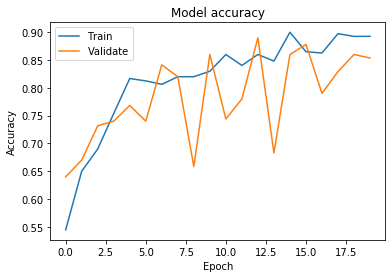

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [16]:
predictions = model.predict(validation)

In [17]:
predictions

array([[0.7595156 ],
       [0.11867207],
       [0.8096591 ],
       [0.32948276],
       [0.5959676 ],
       [0.72873724],
       [0.8003527 ],
       [0.9298839 ],
       [0.7148319 ],
       [0.5883476 ],
       [0.74857384],
       [0.5271547 ],
       [0.908885  ],
       [0.32066733],
       [0.63756627],
       [0.88355124],
       [0.91360354],
       [0.52260804],
       [0.20647393],
       [0.9240802 ],
       [0.81516033],
       [0.44948316],
       [0.53122956],
       [0.54074377],
       [0.8434524 ],
       [0.92022485],
       [0.7102818 ],
       [0.63750684],
       [0.5244026 ],
       [0.5792012 ],
       [0.81590426],
       [0.54098296],
       [0.35822213],
       [0.09455502],
       [0.7429628 ],
       [0.7227626 ],
       [0.9263013 ],
       [0.50762343],
       [0.7900301 ],
       [0.14694473],
       [0.24748427],
       [0.38808653],
       [0.15584569],
       [0.46733576],
       [0.54741585],
       [0.1578074 ],
       [0.65236014],
       [0.343

In [18]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [19]:
newpredictions =  np.rint(predictions)

In [20]:
newpredictions

array([[1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.00